<a href="https://colab.research.google.com/github/axndyg/sagb_inrto_project/blob/main/France_Shots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
france = pd.read_csv('/content/events_France.csv')

In [30]:
shots_france = france[france['eventName'] == 'Shot']
shots_france = shots_france[['eventId', 'subEventName', 'matchId', 'teamId', 'matchPeriod', 'eventSec']]

In [31]:
shots_france["eventSec"] = np.where(shots_france["matchPeriod"] == "2H", shots_france["eventSec"] + 2700, shots_france["eventSec"])

In [32]:
shots = shots_france[['eventId', 'subEventName', 'matchId', 'teamId', 'eventSec']]
shots["eventMin"] = shots["eventSec"] / 60
shots.head()

,eventId,subEventName,matchId,teamId,eventSec,eventMin
213,10,Shot,2500686,3799,605.975493,10.099592
302,10,Shot,2500686,3772,859.236394,14.320607
498,10,Shot,2500686,3772,1568.104834,26.135081
577,10,Shot,2500686,3772,1800.852078,30.014201
629,10,Shot,2500686,3799,2009.537139,33.492286


In [33]:
shots_by_game = shots.groupby("matchId")['eventMin'].apply(list).to_dict()


In [34]:
france_shots = pd.DataFrame({'matchId': list(shots_by_game.keys()), 'shots': list(shots_by_game.values())})


In [35]:
shots_per_game = france_shots['shots'].apply(len).tolist()
shots_by_game_late = france_shots['shots'].apply(lambda x: len([i for i in x if i >= 45])).tolist()
shots_by_game_first = france_shots['shots'].apply(lambda x: len([i for i in x if i < 45])).tolist()


In [36]:
france_shots["total shots"] = shots_per_game
france_shots["shots in second half"] = shots_by_game_late
france_shots["shots in first half"] = shots_by_game_first

france_shots["first half shot density"] =  france_shots["shots in first half"] / france_shots["total shots"]
france_shots["second half shot density"] =  france_shots["shots in second half"] / france_shots["total shots"]

In [37]:
france_shots

,matchId,shots,total shots,shots in second half,shots in first half,first half shot density,second half shot density
0,2500686,"[10.099591550000001, 14.320606566666667, 26.13...",15,9,6,0.400000,0.600000
1,2500687,"[2.0486726000000006, 8.535903766666667, 13.811...",20,11,9,0.450000,0.550000
2,2500688,"[0.6368376000000002, 3.3740954333333333, 9.465...",16,10,6,0.375000,0.625000
3,2500689,"[4.075579200000001, 10.786273450000001, 16.455...",27,17,10,0.370370,0.629630
4,2500690,"[2.554101266666667, 13.709964233333334, 17.603...",14,7,7,0.500000,0.500000
...,...,...,...,...,...,...,...
375,2501061,"[9.23106595, 12.210544366666666, 30.5730148833...",17,10,7,0.411765,0.588235
376,2501062,"[3.0027786333333335, 12.961117616666666, 14.71...",16,7,9,0.562500,0.437500
377,2501063,"[3.5768921000000002, 4.681927683333333, 6.3545...",22,11,11,0.500000,0.500000
378,2501064,"[4.9665233833333335, 8.737340783333334, 10.976...",26,10,16,0.615385,0.384615


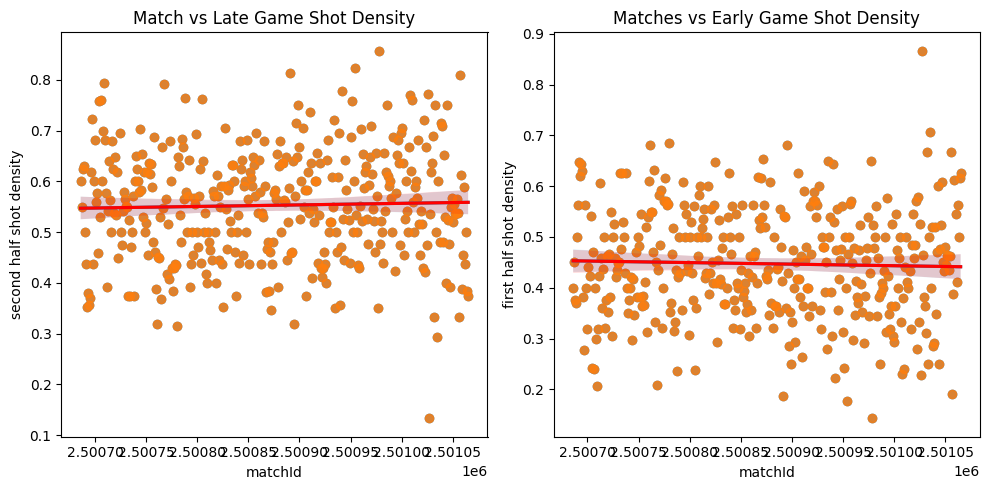

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1
sns.regplot(x="matchId", y="second half shot density", data=france_shots, ax=axs[0])
axs[0].set_xlabel('Matches')
axs[0].set_ylabel('Late Game Shot Density')
axs[0].set_title('Match vs Late Game Shot Density')

# Plot 2
sns.regplot(x="matchId", y="first half shot density", data=france_shots, ax=axs[1])
axs[1].set_xlabel('Matches')
axs[1].set_ylabel('Early Game Shot Density')
axs[1].set_title('Matches vs Early Game Shot Density')

# Adjust spacing between subplots
plt.tight_layout()
sns.regplot(x="matchId", y="second half shot density", data=france_shots, ax=axs[0], line_kws={"color": "red"})
sns.regplot(x="matchId", y="first half shot density", data=france_shots, ax=axs[1], line_kws={"color": "red"})

# Display the plots
plt.show()